In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import tensorflow as tf
import keras.backend as K
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from importlib import reload

# custom module for capstone 2
import cap2tools as c2t
reload(c2t)

Using TensorFlow backend.


<module 'cap2tools' from 'C:\\Users\\Nils\\Documents\\GitHub\\Springboard-Capstone-2-local-yelp\\cap2tools.py'>

In [2]:
# configure GPU memory usage by tensorflow
config = K.tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.90
K.tensorflow_backend.set_session(K.tf.Session(config=config))

In [3]:
# define paths to image directories
train_path = 'downsampled/train'
valid_path = 'downsampled/val'

# create data generators
train_batches, valid_batches = c2t.build_datagens(train_path, valid_path, augment=True)

Found 5480 images belonging to 5 classes.
Found 525 images belonging to 5 classes.


In [4]:
# test different learning rates for model
width = 1200
rates = [0.0005, 0.0002, 0.0001, 0.00005, 0.00002]
replicates = 3
n_epochs = 10

histories = dict()
model_paths = dict()

for rate in rates:
    condition = 'learning_rate_{}'.format(str(rate).replace('.', '-'))
    histories[rate] = c2t.run_in_replicate(width, condition, train_batches, valid_batches, 
                                            replicates=replicates, n_epochs=n_epochs, new_weights=False, 
                                            trainable=True, learning_rate=rate)
    
    # add key-value pairs to model_paths
    for i in range(1, replicates+1):
        key = condition + ' - ' + str(i)
        value = 'models/vgg16_{}_{}.h5'.format(condition, str(i))
        model_paths[key] = value

2018-09-17 22:18:20 - Started training models/vgg16_learning_rate_0-0005_1
2018-09-17 22:44:37 - Started training models/vgg16_learning_rate_0-0005_2
2018-09-17 23:10:53 - Started training models/vgg16_learning_rate_0-0005_3
2018-09-17 23:37:04 - Started training models/vgg16_learning_rate_0-0002_1
2018-09-18 00:03:18 - Started training models/vgg16_learning_rate_0-0002_2
2018-09-18 00:29:46 - Started training models/vgg16_learning_rate_0-0002_3
2018-09-18 00:55:58 - Started training models/vgg16_learning_rate_0-0001_1
2018-09-18 01:22:30 - Started training models/vgg16_learning_rate_0-0001_2
2018-09-18 01:49:09 - Started training models/vgg16_learning_rate_0-0001_3
2018-09-18 02:15:43 - Started training models/vgg16_learning_rate_5e-05_1
2018-09-18 02:42:18 - Started training models/vgg16_learning_rate_5e-05_2
2018-09-18 03:08:47 - Started training models/vgg16_learning_rate_5e-05_3
2018-09-18 03:35:12 - Started training models/vgg16_learning_rate_2e-05_1
2018-09-18 04:01:40 - Started

In [5]:
# save history as json
pd.DataFrame(histories).transpose().to_json('VGG16_learnrate_comparison_history.json')

In [6]:
model_metrics = c2t.eval_models(model_paths, valid_path)

Building image generator...
Found 525 images belonging to 5 classes.
Loading models/vgg16_learning_rate_0-0005_1.h5
Evaluating models/vgg16_learning_rate_0-0005_1.h5
Loading models/vgg16_learning_rate_0-0005_2.h5
Evaluating models/vgg16_learning_rate_0-0005_2.h5
Loading models/vgg16_learning_rate_0-0005_3.h5
Evaluating models/vgg16_learning_rate_0-0005_3.h5
Loading models/vgg16_learning_rate_0-0002_1.h5
Evaluating models/vgg16_learning_rate_0-0002_1.h5
Loading models/vgg16_learning_rate_0-0002_2.h5
Evaluating models/vgg16_learning_rate_0-0002_2.h5
Loading models/vgg16_learning_rate_0-0002_3.h5
Evaluating models/vgg16_learning_rate_0-0002_3.h5
Loading models/vgg16_learning_rate_0-0001_1.h5
Evaluating models/vgg16_learning_rate_0-0001_1.h5
Loading models/vgg16_learning_rate_0-0001_2.h5
Evaluating models/vgg16_learning_rate_0-0001_2.h5
Loading models/vgg16_learning_rate_0-0001_3.h5
Evaluating models/vgg16_learning_rate_0-0001_3.h5
Loading models/vgg16_learning_rate_5e-05_1.h5
Evaluating m

In [7]:
table = c2t.eval_table(model_metrics, 'width')
table

,acc,loss,mpcr
width,,,
learning_rate_0-0005 - 1,0.200,12.894,0.200
learning_rate_0-0005 - 2,0.200,12.894,0.200
learning_rate_0-0005 - 3,0.200,12.894,0.200
learning_rate_0-0002 - 1,0.200,12.894,0.200
learning_rate_0-0002 - 2,0.863,0.370,0.863
learning_rate_0-0002 - 3,0.200,12.894,0.200
learning_rate_0-0001 - 1,0.869,0.337,0.869
learning_rate_0-0001 - 2,0.895,0.306,0.895
learning_rate_0-0001 - 3,0.874,0.346,0.874


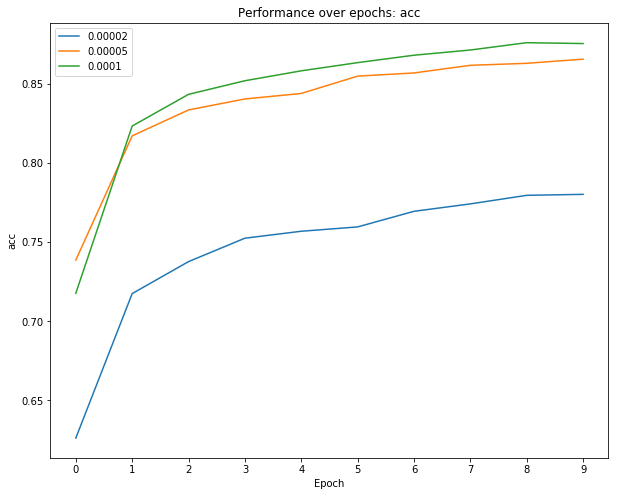

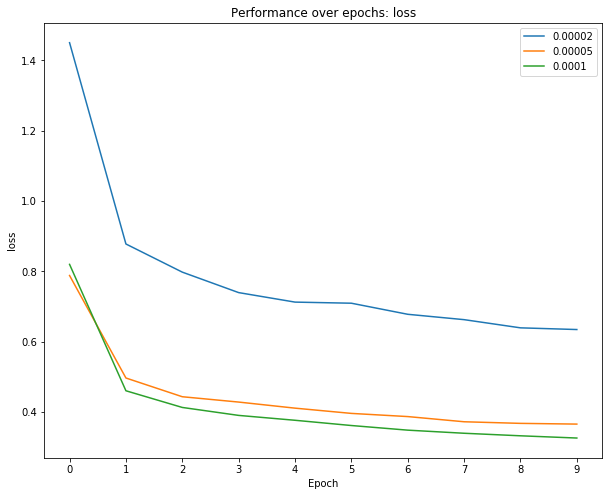

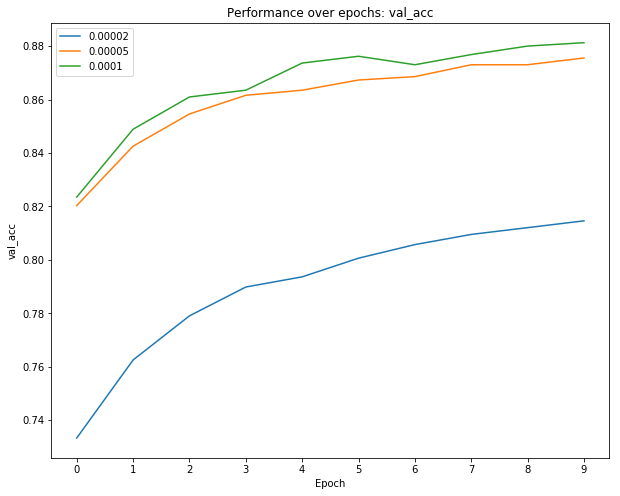

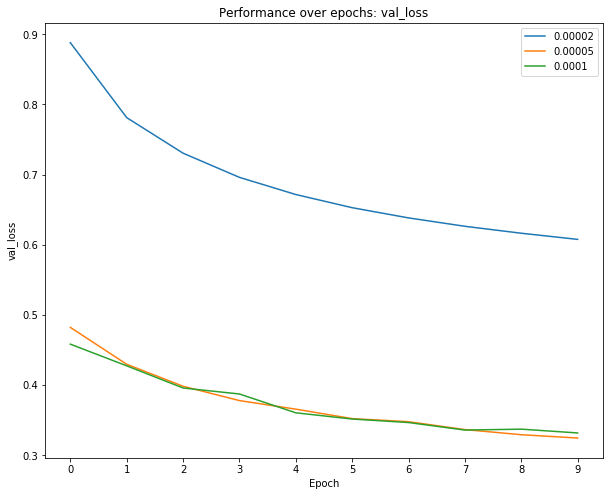

In [15]:
hist_df = pd.read_json('VGG16_learnrate_comparison_history.json', convert_axes=False)

# drop conditions that did not converge
hist_df.drop(['0.0005', '0.0002'], axis=0, inplace=True)

# plot model comparison
c2t.plot_metric('acc', hist_df)
c2t.plot_metric('loss', hist_df)
c2t.plot_metric('val_acc', hist_df)
c2t.plot_metric('val_loss', hist_df)